In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
rcParams['figure.figsize'] = 12, 9
import string

In [3]:
lowerletters="abcdefghijklmnopqrstuvwxyz"
upperletters = lowerletters.upper()
englishfreq=[8.167,1.492, 2.782,4.253,12.702,2.228,2.015,6.094,6.966,0.153,0.772,4.025,2.406,6.749,7.507,1.929,0.095,5.987,6.327,9.056 
   ,2.758 ,0.978 ,2.361 ,0.150 ,1.974,0.074]

In [4]:
def getEncoder(key):
    """Returns a dictionary which maps each lowercase alphabet to the alphabet got by shifting it using the key.
    key : A singleton string describing the shift amount"""
    res = {}
    k = ord(key)-ord('a')
    for i in lowerletters:
        res[i] = chr((ord(i)-ord('a')+k)%26 + ord('a'))
    
    return res
    
getEncoder('c')

{'a': 'c',
 'b': 'd',
 'c': 'e',
 'd': 'f',
 'e': 'g',
 'f': 'h',
 'g': 'i',
 'h': 'j',
 'i': 'k',
 'j': 'l',
 'k': 'm',
 'l': 'n',
 'm': 'o',
 'n': 'p',
 'o': 'q',
 'p': 'r',
 'q': 's',
 'r': 't',
 's': 'u',
 't': 'v',
 'u': 'w',
 'v': 'x',
 'w': 'y',
 'x': 'z',
 'y': 'a',
 'z': 'b'}

In [5]:
def encrypt(ptext, key):
    """ Encrypts the plaintext using a caesar cipher with key
    ptext: Assumed to be a string
    key: Assumed to be a singleton string, i.e., one character string"""
    encode = getEncoder(key)
    ctext = ''
#     ptext = ptext.lower()
    for i in ptext:
        if i in lowerletters:
            ctext += encode[i]
        elif i in upperletters:
            ctext += encode[i.lower()].upper()
        else:
            ctext += i
    
    return ctext

In [6]:
def decrypt(ctext, key):
    """ Decrypts the ciphertext using a caesar cipher with key
    ctext: Assumed to be a string
    key: Assumed to be a singleton string, i.e., one character string"""
    return encrypt(ctext, chr(25-(ord(key)-ord('a'))+ord('a')+1))

In [7]:
def normalizeToPercent(l):
    """Normalizes the list of floats l to a percentage
    l: Assumed to be a list of floats"""
    total = sum(l)
    if total == 0:
        return
    for i in range(len(l)):
        l[i] = l[i]*100.0/total

In [8]:
def getFreq(text):
    """Returns a dictionary which represents the frequency of English characters in the string text.
    The keys are lowercase letters, but the case is ignored when frequency is measured."""
    freq={}
    text = text.lower()
    for i in lowerletters:
        freq[i] = 0
    for i in text:
        if i in lowerletters:
            freq[i] +=1
    
    return freq

In [9]:
def plotFreq(text):
    """Plots the frequency distribution of the string 'text' along with the standard English frequency distribution"""
    
    aDict = getFreq(text)
    l=[]
    for i in lowerletters:
        l.append(aDict[i])
    
    normalizeToPercent(l)
    
    wid = 1
    
    fig,ax = plt.subplots()
    rect1 = ax.bar(range(0,26*wid*3,wid*3), englishfreq, wid, color='purple')
    rect2 = ax.bar(range(wid,26*wid*3 + wid,wid*3), l,wid, color='g')
    
    ax.set_ylabel('Frequency Percent')
    ax.set_xlabel('Letter')
    ax.set_title('Frequency distribution of input string')
    ax.set_xticks(range(wid,26*wid*3 + wid,wid*3))
    ax.set_xticklabels(list(lowerletters))
    
    ax.legend( (rect1[0], rect2[0]), ('Standard English Frequency', 'Input Text Frequency') )
    
    plt.show() 

kdssb
{'a': 0, 'c': 0, 'b': 1, 'e': 2, 'd': 0, 'g': 2, 'f': 0, 'i': 2, 'h': 0, 'k': 0, 'j': 0, 'm': 0, 'l': 0, 'o': 2, 'n': 1, 'q': 0, 'p': 0, 's': 1, 'r': 1, 'u': 0, 't': 1, 'w': 3, 'v': 0, 'y': 0, 'x': 0, 'z': 0}


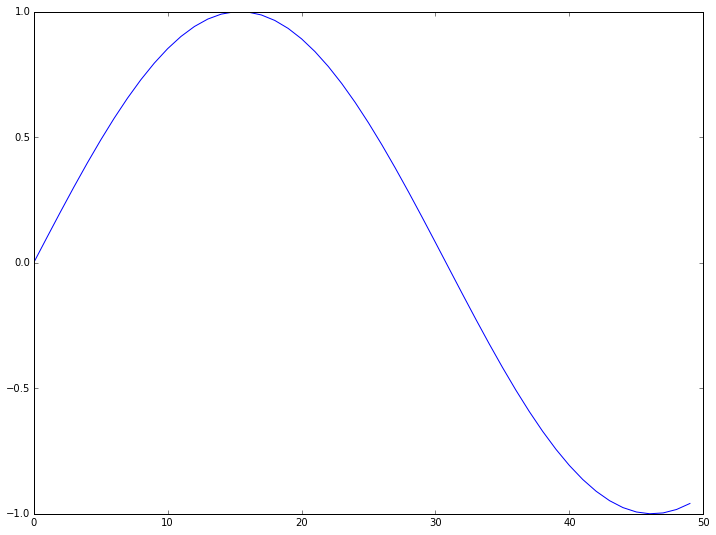

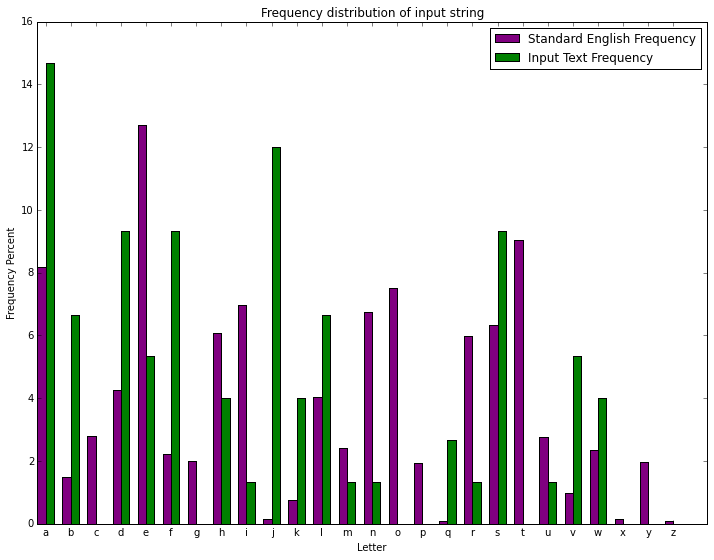

{'a': 11, 'c': 0, 'b': 5, 'e': 4, 'd': 7, 'g': 0, 'f': 7, 'i': 1, 'h': 3, 'k': 3, 'j': 9, 'm': 1, 'l': 5, 'o': 0, 'n': 1, 'q': 2, 'p': 0, 's': 7, 'r': 1, 'u': 1, 't': 0, 'w': 3, 'v': 4, 'y': 0, 'x': 0, 'z': 0}


<Container object of 26 artists>

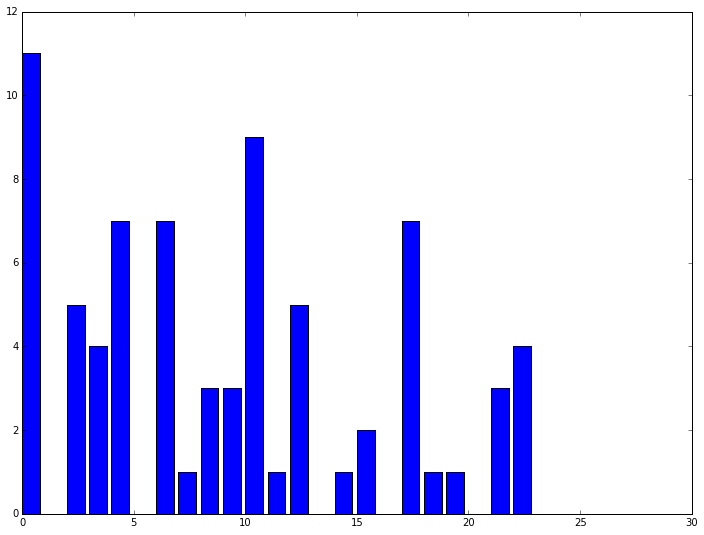

In [10]:
print encrypt("happy","d")
print getFreq("big string wooewew")
plot([sin(x) for x in linspace(0,5)])
plotFreq("ajabsdakjsdasvbdkfjvaeiwqeubfalsjhnfajsdfvwaljekfbsaldj,fbawljerhvlqhjfdamds")
dic = getFreq("ajabsdakjsdasvbdkfjvaeiwqeubfalsjhnfajsdfvwaljekfbsaldj,fbawljerhvlqhjfdamds")
print dic
bar(range(26),dic.values())

qtxmcmfkjejxhxlfxlqisuxzxhovqxzyhqtxfwpfzzbgzuirsaxtdmjtmlzicjzdducugkzopdhlaqtxpfnoocnkmxhwoccxvsubpxfwpfzzbgffbcowfjvwriqhpoypxtknmttlscjoxsreqksbxutzbyldwchqfodzjbdbcqxoeokpqxrmvjosdxiqtxlfrmxdkpqohnsfbezfgkfnkzuznmymbzuihqfrvwqrexxuroqzbeemkvsbcmwlcdq


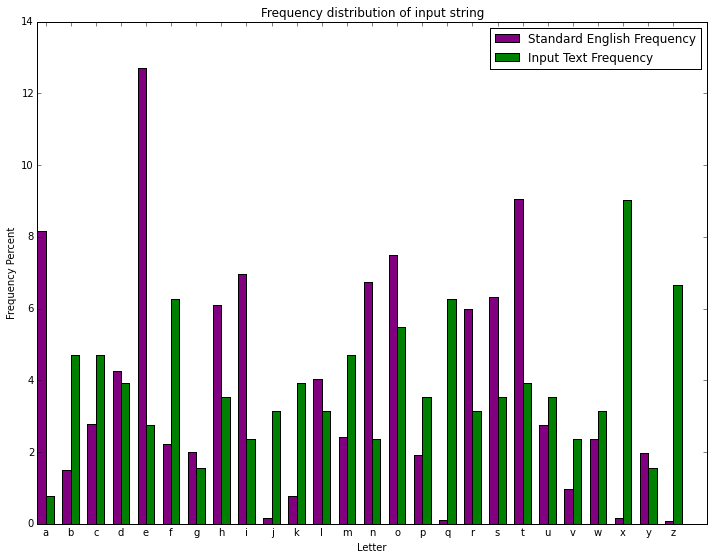

In [11]:
filecreatorIfNeeded = open("ciphertext.txt", 'a+')
filecreatorIfNeeded.close()
ctext = open("ciphertext.txt")
s = ctext.read()
ctext.close()
s = decrypt(s,'f')
print s
dic = getFreq(s)
plotFreq(s)

In [12]:
def decryptFreq(aDict, key):
    """Returns the frequency distribution obtained by decrypting the frequency distribution aDict using key.
    aDict : A dictionary whose keys are lowercase alphabet and values are ints
    key: A singleton string"""
    result = {}
    encode = getEncoder(key)
    for i in lowerletters:
        result[i] = aDict[encode[i]]
    
    return result
    
decryptFreq(dic, 'a')

{'a': 2,
 'b': 12,
 'c': 12,
 'd': 10,
 'e': 7,
 'f': 16,
 'g': 4,
 'h': 9,
 'i': 6,
 'j': 8,
 'k': 10,
 'l': 8,
 'm': 12,
 'n': 6,
 'o': 14,
 'p': 9,
 'q': 16,
 'r': 8,
 's': 9,
 't': 10,
 'u': 9,
 'v': 6,
 'w': 8,
 'x': 23,
 'y': 4,
 'z': 17}

In [13]:
def getDeviation(aDict):
    """Get the mean square deviation of the input frequency distribution from the standard English frequency distribution.
    aDict : A dictionary whose keys are lowercase alphabet and values are ints"""
    freqlist = []
    for i in lowerletters:
        freqlist.append(aDict[i])
    
    normalizeToPercent(freqlist)
    return sum([(freqlist[x]-englishfreq[x])**2 for x in range(26)])/26.0

getDeviation(getFreq(encrypt(s,'f')))

12.386958171649958

In [14]:
def getAllDeviations(aDict):
    """Returns a dictionary whose keys are keys used to decrypt the frequency distribution defined by aDict, and values are the mean
    deviations of the resultant frequency distribution from the standard English frequency distribution.
    aDict : A dictionary whose keys are lowercase alphabet and values are ints"""
    result = {}
    for i in lowerletters:
        temp = decryptFreq(aDict,i)
        result[i] = getDeviation(temp)
    
    return result

getAllDeviations(getFreq(encrypt(s,'f')))

{'a': 12.386958171649958,
 'b': 16.879446859432765,
 'c': 8.1516942199154165,
 'd': 14.465661037411648,
 'e': 11.92738049442522,
 'f': 18.036701761393548,
 'g': 10.786716844349804,
 'h': 15.975736452192942,
 'i': 13.50876812640109,
 'j': 14.203489091710289,
 'k': 12.425751535149205,
 'l': 13.136098443143169,
 'm': 16.603609755360363,
 'n': 13.196792259131103,
 'o': 12.481437809659006,
 'p': 11.122252289297016,
 'q': 13.301648971046635,
 'r': 9.4866263466122493,
 's': 17.411211565315117,
 't': 12.949823933339246,
 'u': 14.509341278738948,
 'v': 12.596188940880726,
 'w': 15.004303571348299,
 'x': 15.043157266672583,
 'y': 11.459145200307573,
 'z': 14.819416693520242}

In [15]:
def crackCaesarCipher(ciphertext):
    """Cracks the Caeser cipher used to encrypt the ciphertext and returns the key.
    Returns: A singleton string with the key."""
    freq = getFreq(ciphertext)
    devs = getAllDeviations(freq)
    key='a'
    mindev = devs['a']
    for i in lowerletters:
        if devs[i]<mindev:
            mindev = devs[i]
            key = i
            
    return key

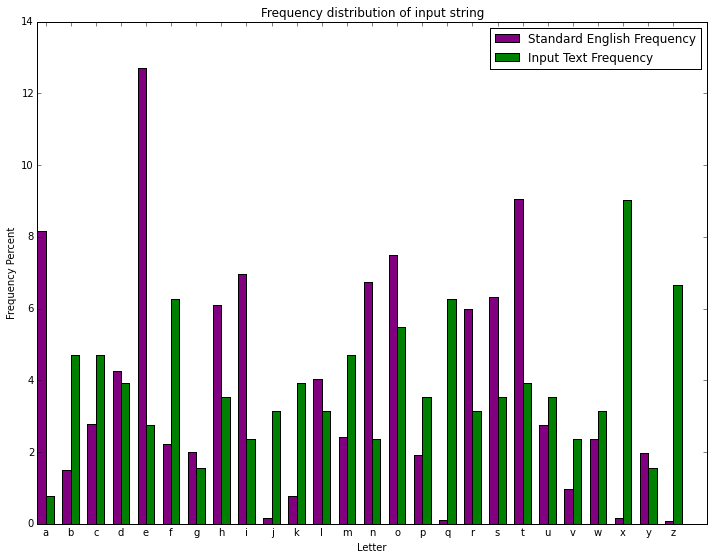

Results of encrypting text using a key and attempting to crack the cipher and get back the key:

Text used:
qtxmcmfkjejxhxlfxlqisuxzxhovqxzyhqtxfwpfzzbgzuirsaxtdmjtmlzicjzdducugkzopdhlaqtxpfnoocnkmxhwoccxvsubpxfwpfzzbgffbcowfjvwriqhpoypxtknmttlscjoxsreqksbxutzbyldwchqfodzjbdbcqxoeokpqxrmvjosdxiqtxlfrmxdkpqohnsfbezfgkfnkzuznmymbzuihqfrvwqrexxuroqzbeemkvsbcmwlcdq

Key used: a	Key deciphered: x
Key used: b	Key deciphered: y
Key used: c	Key deciphered: z
Key used: d	Key deciphered: a
Key used: e	Key deciphered: b
Key used: f	Key deciphered: c
Key used: g	Key deciphered: d
Key used: h	Key deciphered: e
Key used: i	Key deciphered: f
Key used: j	Key deciphered: g
Key used: k	Key deciphered: h
Key used: l	Key deciphered: i
Key used: m	Key deciphered: j
Key used: n	Key deciphered: k
Key used: o	Key deciphered: l
Key used: p	Key deciphered: m
Key used: q	Key deciphered: n
Key used: r	Key deciphered: o
Key used: s	Key deciphered: p
Key used: t	Key deciphered: q
Key used: u	Key deciphered: r
Key u

{'a': 15.043157266672583,
 'b': 11.459145200307573,
 'c': 14.819416693520242,
 'd': 12.386958171649958,
 'e': 16.879446859432765,
 'f': 8.1516942199154165,
 'g': 14.465661037411648,
 'h': 11.92738049442522,
 'i': 18.036701761393548,
 'j': 10.786716844349804,
 'k': 15.975736452192942,
 'l': 13.50876812640109,
 'm': 14.203489091710289,
 'n': 12.425751535149205,
 'o': 13.136098443143169,
 'p': 16.603609755360363,
 'q': 13.196792259131103,
 'r': 12.481437809659006,
 's': 11.122252289297016,
 't': 13.301648971046635,
 'u': 9.4866263466122493,
 'v': 17.411211565315117,
 'w': 12.949823933339246,
 'x': 14.509341278738948,
 'y': 12.596188940880726,
 'z': 15.004303571348299}

In [16]:
ctext = open("ciphertext.txt")
s = decrypt(ctext.read(),'f')
ctext.close()
plotFreq(s)
print "Results of encrypting text using a key and attempting to crack the cipher and get back the key:\n"
print "Text used:\n" + s+"\n"
for i in lowerletters:
    t = encrypt(s,i)
    print('Key used: '+i+'\tKey deciphered: '+crackCaesarCipher(t))

# t = encrypt(s,'j')
# print decrypt(t,'j')
getAllDeviations(getFreq(encrypt(s,'i')))

In [17]:
def decipherText(ciphertext):
    """Deciphers the ciphertext assuming it has been encrypted using a Caeser cipher.
    Deciphering is done using frequency analysis.
    ciphertext : The ciphertext"""
    key = crackCaesarCipher(ciphertext)
    return decrypt(ciphertext,key)
    

Cipher text:
vycrhrkpojocmcqkcqvnxzcecmtavcedmvyckbukeegleznwxfcyiroyrqenhoeiizhzlpetuimqfvycukstthsprcmbthhcaxzguckbukeeglkkghtbkoabwnvmutducypsryyqxhotcxwjvpxgczyegdqibhmvktieogighvctjtpuvcwraotxicnvycqkwrcipuvtmsxkgjeklpkspezesrdrgeznmvkwabvwjcczwtvegjjrpaxghrbqhiv


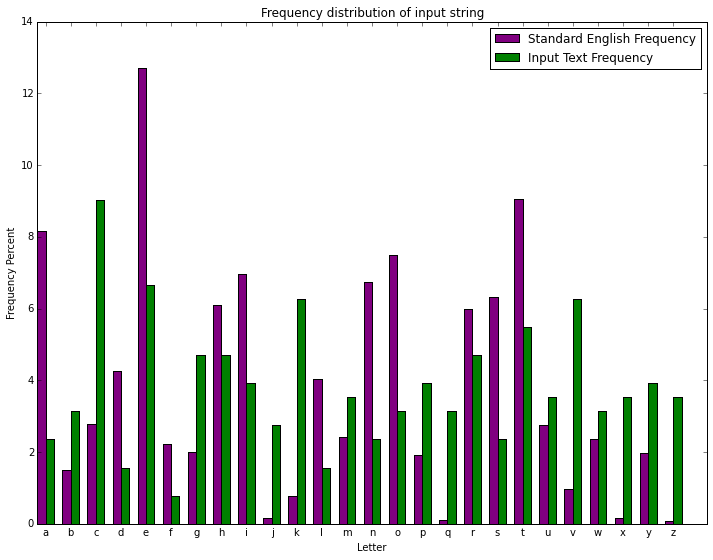


Deciphered text:
twapfpinmhmakaoiaotlvxacakrytacbktwaizsiccejcxluvdawgpmwpoclfmcggxfxjncrsgkodtwasiqrrfqnpakzrffayvxesaizsiccejiiefrzimyzultksrbsawnqpwwovfmravuhtnveaxwcebogzfktirgcmegeftarhrnstaupymrvgaltwaoiupagnstrkqviehcijniqncxcqpbpecxlktiuyztuhaaxurtcehhpnyvefpzofgt

Key used: c


In [18]:
ctext = open("ciphertext.txt")
s = ctext.read()
ctext.close()

print "Cipher text:\n"+s
plotFreq(s)
print "\nDeciphered text:\n"+decipherText(s)
print "\nKey used: "+crackCaesarCipher(s)

In [19]:
wordsFile = open("words.txt")
wordList = wordsFile.read().split(' ')
wordsFile.close()
print len(wordList)

55909


In [20]:
# %timeit crackCaesarCipher(s)

In [21]:
def polyEncrypt(ptext,key):
    """Encrypts the plaintext using a Vigenere cipher with the key.
    ptext, key: Strings"""
    l = len(key)
    result = ''
    c=0
    for i in ptext:
        if i in string.letters:
            result+=encrypt(i,key[c%l])
            c+=1
        else:
            result+=i
    
    return result

polyEncrypt('ATTACK ATDAWN',"lemon")

'LXFOPV EFRNHR'

In [22]:
def polyDecrypt(ctext, key):
    """Decrypts the ciphertext using a Vigenere cipher with the key.
    ptext, key: Strings"""
    dkey = ''
    for i in key:
        dkey += chr(25-(ord(i)-ord('a'))+ord('a')+1)
    
    return polyEncrypt(ctext,dkey)

polyDecrypt('LXFOPV EF RNHR', 'lemon')

'ATTACK AT DAWN'

In [23]:
def splitForKeyLength(intext, keylength):
    """Splits the input text into keylength number of strings. Each string contains the characters which would be
    encrypted by each character of a key whose length is keylength
    intext: String
    keylength: int"""
    strs = []
    for i in range(keylength):
        strs.append('')
    
    c=0
    for i in intext:
        if i in string.letters:
            strs[c%keylength]+=i
            c+=1
    
    return strs

splitForKeyLength('ATTACKATDAWN',5)

['AKW', 'TAN', 'TT', 'AD', 'CA']

In [24]:
def crackVigenereCipher(ciphertext, keylength):
    """Cracks the Vigenere cipher in the ciphertext, assuming the key has a length of keylength
    ciphertext: String
    keylength: int"""
    strs = splitForKeyLength(ciphertext, keylength)
    key = ''
    for i in strs:
        key += crackCaesarCipher(i)
    
    
    ptex = polyDecrypt(ciphertext, key)
    return (key, getDeviation(getFreq(ptex)))


In [25]:
ctext = open("ciphertext.txt")
s = ctext.read()
ctext.close()

# polyEncrypt(s,'lemon')
# polyDecrypt(s,'lemon')
crackVigenereCipher(s,7)

('cqcprot', 4.7408386318279945)

In [26]:
def decipherTextVigenere(ciphertext):
    """Cracks the Vigenere cipher in the ciphertext, and returns the decrypted text.
    Assumes the key has length between 1 and 20.
    ciphertext: String"""
    results = []
    for i in range(1,21,1):
        results.append(crackVigenereCipher(ciphertext,i))
    
    mindev = results[0][1]
    minkey = results[0][0]
    for i in results:
        if i[1]<mindev:
            mindev = i[1]
            minkey = i[0]
    
    print "Key: " + minkey
    return polyDecrypt(ciphertext, minkey)

Key: crydtoglaph


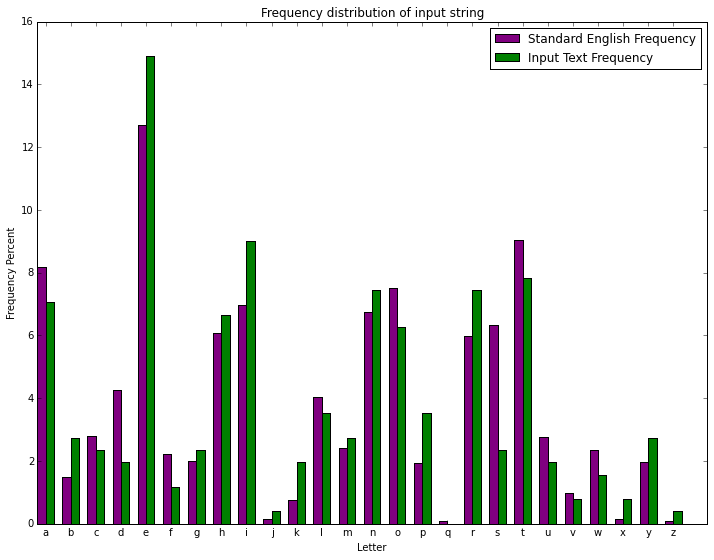

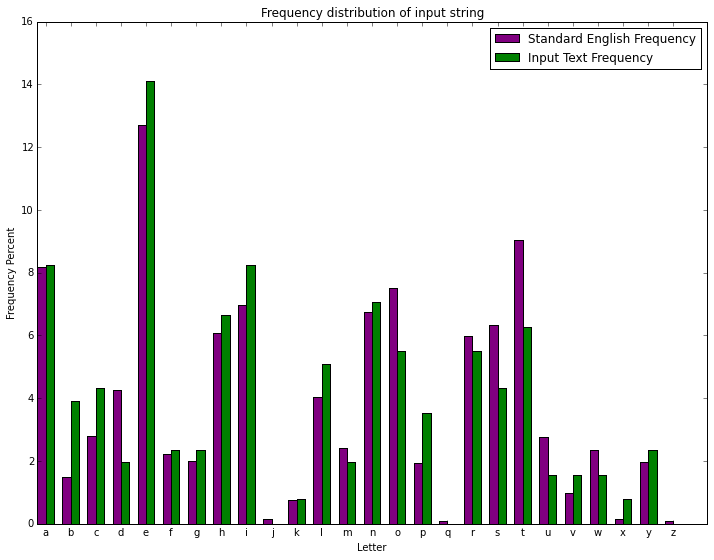

l
22.7057319881
24.6110831586


In [27]:
ptex = decipherTextVigenere(s)
plotFreq(ptex)
plotFreq(polyDecrypt(s,'cryptograph'))

# print "With deciphered key: "+str(getDeviation(getFreq(ptex)))
# print getDeviation(getFreq(polyDecrypt(s,'cryptograph')))
# print ptex

s1 = splitForKeyLength(s,11)[-4]
k = crackCaesarCipher(s1)
print k
print getDeviation(getFreq(decrypt(s1,'l')))
print getDeviation(getFreq(decrypt(s1,'r')))



In [28]:
ctext = open("ciphertext.txt")
s = ctext.read()
ctext.close()

decipherTextVigenere(s)

Key: crydtoglaph


'theoodeeouhavenrokknisanejampreofthehigeterecipterwnichwasbutititsfinmlfoxmbytherrenihdiployatbraisedehigetereitieanedampleoraporyalphanetiicipherunotnerwordetheiipherieconytantlyohanmingthenrilriantcopewayeventumllyhrokenbkthelamousezginkercharxesbgbbage'

In [36]:
def purgePunc(s):
    """Returns the string s, with all non-alphabetic characters removed"""
    result = ''
    for i in s:
        if i in string.ascii_letters:
            result+=i
    
    return result

print purgePunc("Punc,tuati\'on, is:,every;whe(r10e)")

Punctuationiseverywhere


In [40]:
def getRepeatDistances(s):
    """Returns the distances between repeating sequences of 3 characters in s
    Example: 'ABCGHJABCGIIHJA' returns [6,6,8]
    The repeating sequences are ABC, BCG and HJA"""
    s = purgePunc(s)
    l = len(s)
    result = []
    words = [s[i:i+3] for i in range(l)]
    for i in range(l):
        for j in range(i+1,l,1):
            if words[i]==words[j]:
                result.append(j-i)
            
    return result


# getRepeatDistances('RIKVBIYBITHUSEVAZMMLTKASRNHPNPZICSWDSVMBIYFQEZUBZPBRGYNTBURMBECZQKBMBPAWIXSOFNUZECNRAZFPHIYBQEOCTTIOXKUNOHMRGCNDDXZWIRDVDRZYAYYICPUYDHCKXQIECIEWUICJNNACSAZZZGACZHMRGXFTILFNNTSDAFGYWLNICFISEAMRMORPGMJLUSTAAKBFLTIBYXGAVDVXPCTSVVRLJENOWWFINZOWEHOSRMQDGYSDOPVXXGPJNRVILZNAREDUYBTVLIDLMSXKYEYVAKAYBPVTDHMTMGITDZRTIOVWQIECEYBNEDPZWKUNDOZRBAHEGQBXURFGMUECNPAIIYURLRIPTFOYBISEOEDZINAISPBTZMNECRIJUFUCMMUUSANMMVICNRHQJMNHPNCEPUSQDMIVYTSZTRGXSPZUVWNORGQJMYNLILUKCPHDBYLNELPHVKYAYYBYXLERMMPBMHHCQKBMHDKMTDMSSJEVWOPNGCJMYRPYQELCDPOPVPBIEZALKZWTOPRYFARATPBHGLWWMXNHPHXVKBAANAVMNLPHMEMMSZHMTXHTFMQVLILOVVULNIWGVFUCGRZZKAUNADVYXUDDJVKAYUYOWLVBEOZFGTHHSPJNKAYICWITDARZPVU')
print len(s)
getRepeatDistances(s)

255


[33, 77, 187, 176, 44, 154, 66, 66, 66, 66, 66, 66, 66, 177, 110, 66, 22]

In [31]:
def getFirstFactors(n):
    """Returns a list of factors of n, under 20.
    n: int"""
    return [x for x in range(2,21,1) if n%x==0]
        

In [32]:
getFirstFactors(200)

[2, 4, 5, 8, 10, 20]

In [44]:
def getProbableKeyLength(ciphertext):
    """Returns the probable length of the vigenere cipher key used to create the given cipher text.
    The most probable key length is the number which is the most common factor of the repeat distances
    in the ciphertext. Assumes the key length is less than or equal to 20"""
    dists = getRepeatDistances(ciphertext)
    dic = {2:0}
    for i in dists:
        facts = getFirstFactors(i)
        for j in facts:
            dic[j]=dic.get(j,0)+1
    
    maxKey = 2
    maxVal = dic[2]
    for i in dic.keys():
        if dic[i]>maxVal:
            maxVal = dic[i]
            maxKey = i
    
    return maxKey
        

In [45]:
getProbableKeyLength(s)

11

In [46]:
s1=splitForKeyLength(s,11)[3]
getAllDeviations(getFreq(s1))
# decrypt(s1,'p')
# polyDecrypt(s,'cryptograph')

{'a': 28.162210103533514,
 'b': 31.305353916242545,
 'c': 24.758531173767629,
 'd': 16.087293715573647,
 'e': 26.887628163734185,
 'f': 32.783614785807757,
 'g': 29.620738531627165,
 'h': 27.801340538316126,
 'i': 26.478263615239197,
 'j': 20.698330504871308,
 'k': 29.919735187145555,
 'l': 30.528096391158929,
 'm': 21.60167498647666,
 'n': 23.660537862730841,
 'o': 24.888965956376328,
 'p': 27.587628163734188,
 'q': 21.462878999854585,
 'r': 33.652176658717458,
 's': 33.877929167078669,
 't': 25.458196725607095,
 'u': 27.575588029954925,
 'v': 39.189300404536851,
 'w': 22.544484351025154,
 'x': 23.688297060055255,
 'y': 24.664216792496727,
 'z': 23.712377327613787}